In [37]:
from os import chdir, listdir, walk
chdir('/home/gergely/code/fiberphotometry/')
import numpy as np
import fiberphotometry as fp
import behavior as beh
from tdt import read_block

%config Completer.use_jedi = False
%matplotlib inline

GCAMP = '_465N' # GCaMP channel (dynamic signal) 
ISOS = '_405N' # Isobestic channel (static signal)

BLOCK_PATH = '/data/gergely/invivo_DATA/fiberPhotometry/dock05b-2-210224-110203/LFPCamFP-210321-193358/'
data = read_block(BLOCK_PATH)

Found Synapse note file: /data/gergely/invivo_DATA/fiberPhotometry/dock05b-2-210224-110203/LFPCamFP-210321-193358/Notes.txt
read from t=0s to t=3654.79s


In [65]:
im_data = np.array(data.streams[GCAMP].data)
iso_data = np.array(data.streams[ISOS].data)
time_data = np.linspace(1, len(im_data), len(im_data)) / data.streams[GCAMP].fs
print(f"imaging: {len(im_data)}, iso: {len(iso_data)}, time: {len(time_data)}") 

imaging: 3717760, iso: 3717760, time: 3717760


In [68]:
decimated_im = []
decimated_iso = []
decimated_time = []

N = 100

for i in range (0, len(im_data), N):
    decimated_im.append(np.mean(im_data[i:i+N-1]))
    
for i in range (0, len(iso_data), N):
    decimated_iso.append(np.mean(iso_data[i:i+N-1]))

for i in range (0, len(time_data), N):
    decimated_time.append(np.mean(time_data[i:i+N-1]))
    
print(f"imaging: {len(decimated_im)}, \
        iso: {len(decimated_iso)}, \
        time: {len(decimated_time)}") 

imaging: 37178,         iso: 37178,         time: 37178


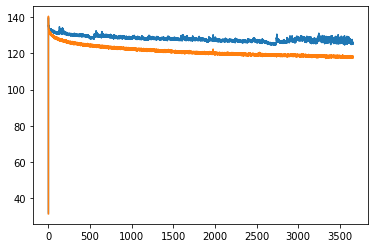

In [70]:
ax = plt.gca()
ax.plot(decimated_time, decimated_im)
ax.plot(decimated_time, decimated_iso)

In [4]:
print(len(data.streams[GCAMP].data))
data = fp.downsampling(data, N=100)
dFF = fp.detrending(data)

print(len(data.streams[GCAMP].data))
print(len(dFF))

N=100
time_x = fp.resample(data)
print(len(time_x))
# time_x = time_x[::N] # go from beginning to end of array in steps on N
# time_x = time_x[:len(data.streams[GCAMP].data)]
print(len(time_x))
#         else:            
#             dFF = detrending(data)
#             time_x = resample(data)
#         p1, = ax.plot(dFF, linewidth=.2,
#                color='green', label='GCaMP')
#         ax.set_ylabel(r'$\Delta$F/F')
#         ax.set_xlabel('Seconds')
#         ax.legend(handles=[p1], loc='upper right')
#         ax.set_title('dFoF')

3717760
37178
37178
37178
37178


In [5]:
data['streams'].keys()

dict_keys(['_405N', '_465N', 'EMGP', 'Raw_', 'Fi1r'])

In [2]:
downsampled = fp.downsampling(data)

In [3]:
downsampled

epocs	[struct]
snips	[struct]
streams	[struct]
scalars	[struct]
info	[struct]
time_ranges:	array([[ 0.],
       [inf]])

In [4]:
time = fp.resample(downsampled)

In [6]:
time

CPU times: user 5 µs, sys: 4 µs, total: 9 µs
Wall time: 15.3 µs


In [7]:
# data.keys()
data['info'].keys()

dict_keys(['tankpath', 'blockname', 'start_date', 'utc_start_time', 'stop_date', 'utc_stop_time', 'duration', 'stream_channel', 'snip_channel', 'experiment', 'subject', 'user', 'start', 'stop'])

In [8]:
str(data['info']['start_date'])

'2021-03-21 22:34:03.999999'

In [9]:
str(data['info']['utc_start_time'])

'22:34:03'

In [10]:
data['info']['start']

'7:34:05pm 03/21/2021'

In [11]:
data['info']['stop']

'8:34:59pm 03/21/2021'

In [35]:
data1 = data.copy()

In [36]:
data1

{}

<AxesSubplot:title={'center':'raw photometry traces'}, xlabel='Seconds', ylabel='mV'>

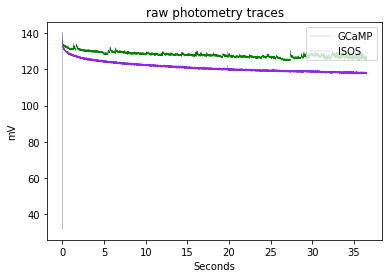

In [12]:
fp.plotting(data, kind='raw')

<AxesSubplot:title={'center':'Demodulated photometry traces'}, xlabel='Seconds', ylabel='mV'>

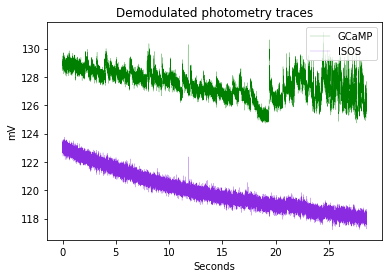

In [13]:
fp.plotting(data, kind='rawDemod')

<AxesSubplot:title={'center':'dFoF'}, xlabel='Seconds', ylabel='$\\Delta$F/F'>

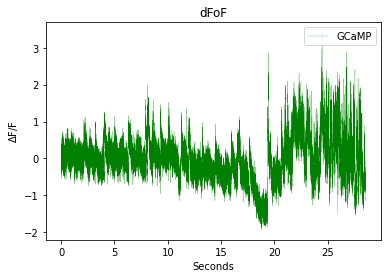

In [14]:
fp.plotting(data, kind='dfof')

In [4]:
noart = fp.artifactRemoval(data)
noart.keys()

dict_keys(['GCAMP', 'ISOS', 'TIME'])

In [8]:
GCAMP = '_465N' # GCaMP channel (dynamic signal) 
ISOS = '_405N' # I

In [15]:
time = np.linspace(1,len(data.streams[GCAMP].data),
                   len(data.streams[GCAMP].data))/data.streams[GCAMP].fs
len(time)

29040

In [16]:
npts = len(data.streams[GCAMP].data)
time_x = np.linspace(1, npts, npts) / data.streams[GCAMP].fs
len(time_x)

29040

In [17]:
len(data.streams[GCAMP].data)

29040

In [18]:
len(data['streams']['_405N']['data'])

29040

In [19]:
import matplotlib.pyplot as plt
import numpy as np
import datetime
# import scipy as sp
# from scipy import io as sio
from PIL import Image as im
# import sima

In [20]:
data_path = ('/data/gergely/invivo_DATA/fiberPhotometry/tracking/dock1/overnite_rec/')
files = []
for (dirpath, dirnames, filenames) in walk(data_path):
    files.extend(filenames)
files.sort()
files

['2021-03-21 13-30-54.mat',
 '2021-03-21 14-30-59.mat',
 '2021-03-21 15-31-06.mat',
 '2021-03-21 16-30-59.mat',
 '2021-03-21 17-31-06.mat',
 '2021-03-21 18-30-59.mat',
 '2021-03-21 19-30-59.mat',
 '2021-03-21 20-30-59.mat',
 '2021-03-21 21-30-59.mat',
 '2021-03-21 22-30-59.mat',
 '2021-03-21 23-30-59.mat',
 '2021-03-22 00-30-59.mat',
 '2021-03-22 01-31-06.mat',
 '2021-03-22 02-30-59.mat',
 '2021-03-22 03-30-59.mat',
 '2021-03-22 04-30-59.mat',
 '2021-03-22 05-30-59.mat',
 '2021-03-22 06-30-59.mat',
 '2021-03-22 07-31-06.mat',
 '2021-03-22 08-30-59.mat',
 '2021-03-22 09-30-59.mat',
 '2021-03-22 10-30-59.mat']

In [21]:
dirpath

'/data/gergely/invivo_DATA/fiberPhotometry/tracking/dock1/overnite_rec/'

In [22]:
mat_path = dirpath+files[8]
# data = sio.loadmat(data_path)
data = beh.load_tracking(mat_path)

In [23]:
files[8]

'2021-03-21 21-30-59.mat'

In [24]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'versionName', 'mouseID', 'recorderName', 'ArduHistory', 'Note', 'ROI', 'bkImg2D', 'ROIMap', 'recordedTime', 'ROIscoreData', 'actHistPars', 'actHistData', 'actHistState', 'trackData', 'velocityData', 'moveTag', 'checkFrames', 'sleepData', 'laserEvent', 'laserInfo', 'motionPIRData', 'actHistDataPIR', 'ampLiveData', 'filename'])

In [25]:
data['actHistPars']

array([[3600,   60]], dtype=uint16)

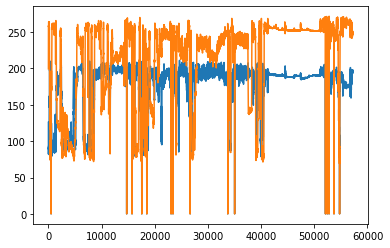

In [26]:
plt.plot(data['trackData'][0:,2])
plt.plot(data['trackData'][0:,1])

In [27]:
data['recordedTime'][0][0]

32399.695890773335

In [28]:
start_time = data['recordedTime'][0][1]
stop_time = data['recordedTime'][0][0]
str(datetime.timedelta(seconds=stop_time))

'8:59:59.695891'

In [29]:
data['sleepData']

array([[ 69.00005336,  77.00004513,   8.        ],
       [107.00005281, 113.00004686,   6.        ],
       [124.0000469 , 169.00005367,  45.        ],
       [213.00003423, 218.00003274,   5.        ],
       [226.00004118, 306.00003438,  80.        ],
       [356.00003657, 413.0000539 ,  57.        ],
       [432.00005122, 459.00005349,  27.        ],
       [524.00003722, 537.00005832,  13.        ]])

In [30]:
second_sleep = data['sleepData'][0:1]
second_sleep

array([[69.00005336, 77.00004513,  8.        ]])

In [31]:
data['velocityData']

array([[ 2.87997170e+04,  1.51612388e+02,  2.48330504e+00],
       [ 2.88001516e+04,  1.49965895e+00, -3.44059002e-01],
       [ 2.88005861e+04,  1.46203369e+02, -7.51284149e-01],
       ...,
       [ 3.23995261e+04,  9.57559190e+00,  2.56210362e+00],
       [ 3.23995940e+04,  8.07799936e+00,  2.16013297e+00],
       [ 3.23996619e+04,  5.09785853e+00,  2.27341804e+00]])

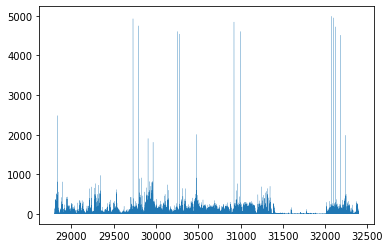

In [32]:
plt.plot(data['velocityData'][0:,0], data['velocityData'][0:,1], linewidth=.2)

/home/gergely/.virtualenvs/photometry/lib/python3.6/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


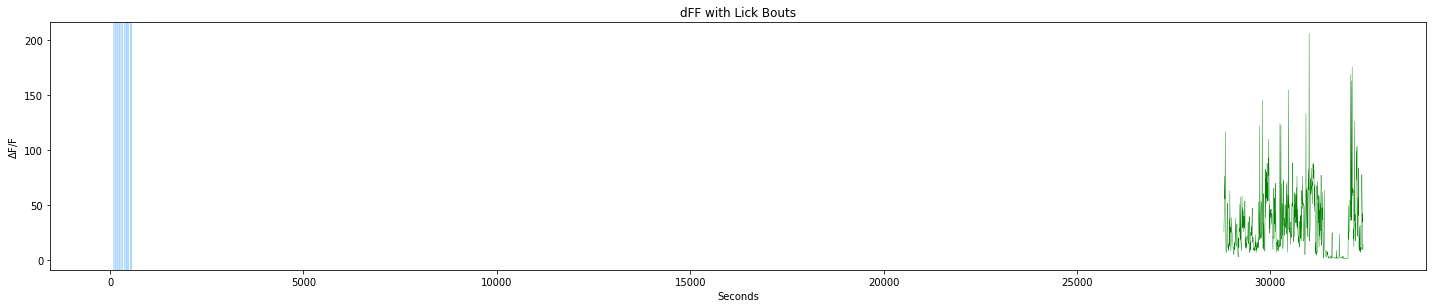

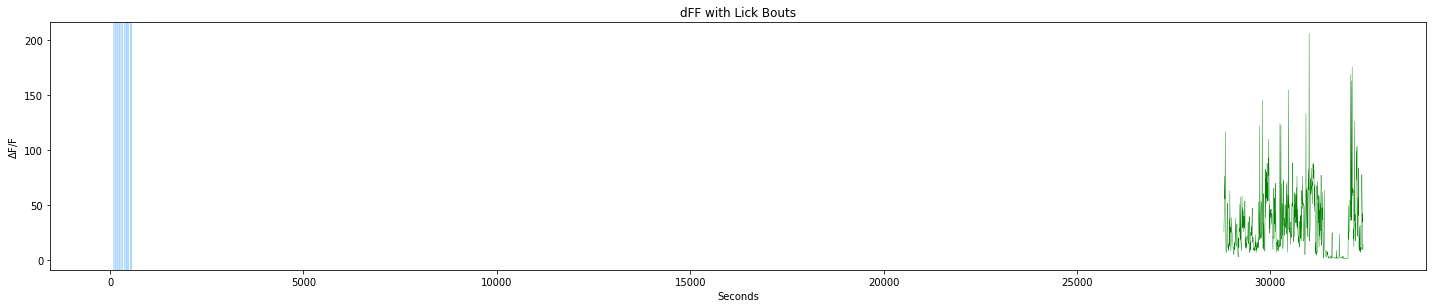

In [35]:
fig = plt.figure(figsize=(20,12))
ax1 = fig.add_subplot(311)

ax1 = fig.add_subplot(311)
p1, = ax1.plot(decimatedData['decimatedTime'], decimatedData['decimatedSignal'],
               linewidth=.4, color='green', label='GCaMP')
for on, off in zip(data['sleepData'][0:,0], data['sleepData'][0:,1]):
    ax1.axvspan(on, off, alpha=0.25, color='dodgerblue')
ax1.set_ylabel(r'$\Delta$F/F')
ax1.set_xlabel('Seconds')
ax1.set_title('dFF with Lick Bouts')
fig.tight_layout()
fig

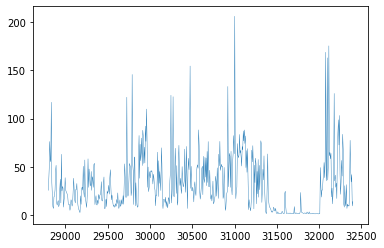

In [37]:
plt.plot(decimatedData['decimatedTime'], decimatedData['decimatedSignal'], linewidth=.4)

In [36]:
data['velocityData'][0:,1]

array([151.61238825,   1.49965895, 146.20336931, ...,   9.5755919 ,
         8.07799936,   5.09785853])

In [34]:
decimatedData = {}
decimatedSignal = []
decimatedTime = []
N = 100

for i in range(0, len(data['velocityData'][0:,1]), N):        
        # This is the moving window mean
        mean_wnd = np.mean(data['velocityData'][0:,1][i:i+N-1])
        decimatedSignal.append(mean_wnd)
np.array(decimatedSignal)
    
time_x = data['velocityData'][0:,0]
time_x = time_x[::N] # go from beginning to end of array in steps on N
time_x = time_x[:len(data['velocityData'][0:,1])]

decimatedData['decimatedSignal'] = decimatedSignal
decimatedData['decimatedTime'] = time_x

In [18]:
from scipy.signal import butter, filtfilt

In [19]:
velo = np.array(decimatedData['decimatedSignal'])

In [21]:
b, a = butter(3, 0.1)
y = filtfilt(b,a, velo)

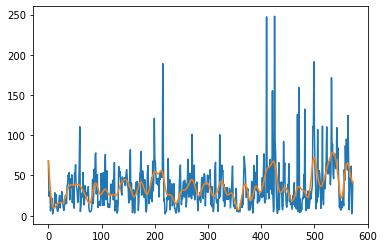

In [22]:
plt.plot(velo)
plt.plot(y)

### check the plot w/o decimation

In [50]:
def reject_outliers(velo, m=2):
    return velo[abs(velo - np.mean(velo)) < m * np.std(velo)]

In [ ]:
reject

In [57]:
filt_velo = reject_outliers(velo)

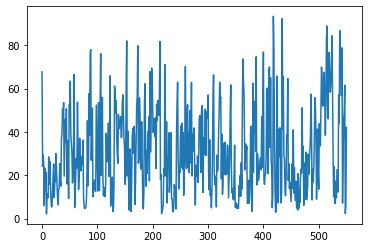

In [58]:
plt.plot(filt_velo)

In [14]:
data['sleepData']

array([[0, 0, 0]], dtype=uint8)